In [69]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import math 
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# Retrive data from file
tweet =  pd.read_csv("C:\\Users\\prabh\\Downloads\\Capstone Project\\Finance_tweets.csv")
tweet.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Andrea Toucinho,"Paris, France","Consultante, Conférencière, Journaliste, Auteu...",2017-12-04 16:21:52+00:00,1314,2031,2812,False,2022-07-04 19:09:10+00:00,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","['innovation', 'payments', 'Europe', 'Finance']",Twitter for Android,False
1,TMJ-RIP Finance Jobs,"Providence, RI",Follow this account for geo-targeted Finance j...,2009-04-22 11:28:51+00:00,283,185,0,False,2022-07-04 19:09:02+00:00,Click the link in our bio to see currently ope...,"['Finance', 'Quincy']",CareerArc 2.0,False
2,World Finance News,United States,Critical insights and analysis on Finance in t...,2022-03-11 19:06:05+00:00,1097,153,380,False,2022-07-04 19:08:58+00:00,"39% of US Millennials Hold Crypto Assets, Repo...","['businessnews', 'finance', 'marketnews']",WorldFinNews,False
3,Comidoc,"Paris, France",I'm a bot ! \nI post only *FREE* Udemy courses...,2018-06-21 14:51:57+00:00,3786,0,32585,False,2022-07-04 19:08:53+00:00,Investment Portfolio Optimization with Excel &...,"['Udemy','Value','Investing','Quantitative','F...",comidoc_net_api,False
4,motionfinity,"Geesthacht, Deutschland",Business Management │ Smart Brexit Solutions │...,2019-08-05 18:33:27+00:00,66,333,1374,False,2022-07-04 19:07:30+00:00,#Brexit daily #BrexitNews day #BrexitReality #...,"['Brexit', 'BrexitNews', 'BrexitReality', 'Bre...",Twitter for iPhone,False
5,Brandable domains For Sale,USA,https://t.co/JiAiKZWknz\n#startupnaming #busin...,2013-09-29 13:36:31+00:00,2361,1356,1077,False,2022-07-04 19:06:33+00:00,BankStack. io for sale $279\nhttps://t.co/ngmM...,"['startupnaming', 'businessnaming', 'brandname...",Twitter Web App,False
6,Wisconsin Finance,Wisconsin,Follow this account for geo-targeted Finance j...,2011-01-11 05:01:40+00:00,276,178,0,False,2022-07-04 19:06:22+00:00,Want to work at Meijer? We're hiring in #Wauke...,"['Waukesha', 'Finance']",CareerArc 2.0,False
7,TurnKey Lender,Austin,Democratizing access to capital for over 50 mi...,2014-03-25 11:03:19+00:00,1368,3431,2739,False,2022-07-04 19:06:01+00:00,TurnKey Lender’s Equipment Financing Platform ...,NaN,HubSpot,False
8,Taxyog,"New Delhi, India","Solution for all your tax-related problems, We...",2022-06-03 12:23:27+00:00,3,7,2,False,2022-07-04 19:05:48+00:00,E-invoicing ‘soon to be mandated’ for units wi...,['taxyog'],Twitter for Android,False
9,luzdina,NaN,Alegre y divertida,2022-06-30 19:31:15+00:00,0,5,0,False,2022-07-04 19:05:32+00:00,Check out @rewardy_app where you can earn real...,NaN,Twitter for Android,False


In [27]:
# Check the numbers of records and attributes
tweet.shape

(30124, 13)

In [28]:
tweet.describe()

,user_followers,user_friends,user_favourites
count,3.012400e+04,30124.000000,30124.000000
mean,9.087923e+03,1105.150744,2848.191840
std,9.575768e+04,4807.241416,12618.583287
min,0.000000e+00,0.000000,0.000000
25%,1.750000e+02,80.000000,1.000000
50%,3.790000e+02,142.000000,82.000000
75%,2.005000e+03,646.000000,944.000000
max,1.023660e+07,375274.000000,422316.000000


In [29]:
# Display datatypes of all Attributes
tweet.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [30]:
# droping user location
tweet = tweet.drop(['user_location'],axis=1)
tweet.head()

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Andrea Toucinho,"Consultante, Conférencière, Journaliste, Auteu...",2017-12-04 16:21:52+00:00,1314,2031,2812,False,2022-07-04 19:09:10+00:00,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","['innovation', 'payments', 'Europe', 'Finance']",Twitter for Android,False
1,TMJ-RIP Finance Jobs,Follow this account for geo-targeted Finance j...,2009-04-22 11:28:51+00:00,283,185,0,False,2022-07-04 19:09:02+00:00,Click the link in our bio to see currently ope...,"['Finance', 'Quincy']",CareerArc 2.0,False
2,World Finance News,Critical insights and analysis on Finance in t...,2022-03-11 19:06:05+00:00,1097,153,380,False,2022-07-04 19:08:58+00:00,"39% of US Millennials Hold Crypto Assets, Repo...","['businessnews', 'finance', 'marketnews']",WorldFinNews,False
3,Comidoc,I'm a bot ! \nI post only *FREE* Udemy courses...,2018-06-21 14:51:57+00:00,3786,0,32585,False,2022-07-04 19:08:53+00:00,Investment Portfolio Optimization with Excel &...,"['Udemy','Value','Investing','Quantitative','F...",comidoc_net_api,False
4,motionfinity,Business Management │ Smart Brexit Solutions │...,2019-08-05 18:33:27+00:00,66,333,1374,False,2022-07-04 19:07:30+00:00,#Brexit daily #BrexitNews day #BrexitReality #...,"['Brexit', 'BrexitNews', 'BrexitReality', 'Bre...",Twitter for iPhone,False


In [31]:
# Convert Test attributes datatype to String
tweet['text'] = tweet['text'].astype('string')
tweet.dtypes

user_name           object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                string
hashtags            object
source              object
is_retweet            bool
dtype: object

In [32]:
# Check Dataset has duplicate Recoreds
isDuplicates = tweet.duplicated().sum()
isDuplicates


87

In [33]:
# Remove duplicates records
tweet.drop_duplicates(inplace = True)

In [34]:
tweet.shape

(30037, 12)

In [35]:
#Cleaning Text (RT, Punctuation. Emojis etc)

#Creating new dataframe and new features
tw_list = tweet

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["CleanedText"] = tw_list.text.map(remove_rt).map(rt)
tw_list["CleanedText"] = tw_list.CleanedText.str.lower() 
tw_list.head(5)

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,CleanedText
0,Andrea Toucinho,"Consultante, Conférencière, Journaliste, Auteu...",2017-12-04 16:21:52+00:00,1314,2031,2812,False,2022-07-04 19:09:10+00:00,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","['innovation', 'payments', 'Europe', 'Finance']",Twitter for Android,False,in berlin germany ready for 2022 inno...
1,TMJ-RIP Finance Jobs,Follow this account for geo-targeted Finance j...,2009-04-22 11:28:51+00:00,283,185,0,False,2022-07-04 19:09:02+00:00,Click the link in our bio to see currently ope...,"['Finance', 'Quincy']",CareerArc 2.0,False,click the link in our bio to see currently ope...
2,World Finance News,Critical insights and analysis on Finance in t...,2022-03-11 19:06:05+00:00,1097,153,380,False,2022-07-04 19:08:58+00:00,"39% of US Millennials Hold Crypto Assets, Repo...","['businessnews', 'finance', 'marketnews']",WorldFinNews,False,39 of us millennials hold crypto assets repo...
3,Comidoc,I'm a bot ! \nI post only *FREE* Udemy courses...,2018-06-21 14:51:57+00:00,3786,0,32585,False,2022-07-04 19:08:53+00:00,Investment Portfolio Optimization with Excel &...,"['Udemy','Value','Investing','Quantitative','F...",comidoc_net_api,False,investment portfolio optimization with excel ...
4,motionfinity,Business Management │ Smart Brexit Solutions │...,2019-08-05 18:33:27+00:00,66,333,1374,False,2022-07-04 19:07:30+00:00,#Brexit daily #BrexitNews day #BrexitReality #...,"['Brexit', 'BrexitNews', 'BrexitReality', 'Bre...",Twitter for iPhone,False,brexit daily brexitnews day brexitreality ...


In [36]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['CleanedText'].apply(lambda CleanedText: pd.Series(TextBlob(CleanedText).sentiment))
for index, row in tw_list['CleanedText'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp < 0: 
        tw_list.loc[index, 'sentiment'] = "negative"
        tw_list.loc[index, 'sentiment_weight'] = -1
    elif comp > 0:
        tw_list.loc[index, 'sentiment'] = "positive"
        tw_list.loc[index, 'sentiment_weight'] = 1
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'sentiment_weight'] = 0
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
    
tw_list.head()

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,...,is_retweet,CleanedText,polarity,subjectivity,sentiment,sentiment_weight,neg,neu,pos,compound
0,Andrea Toucinho,"Consultante, Conférencière, Journaliste, Auteu...",2017-12-04 16:21:52+00:00,1314,2031,2812,False,2022-07-04 19:09:10+00:00,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","['innovation', 'payments', 'Europe', 'Finance']",...,False,in berlin germany ready for 2022 inno...,0.2,0.5,positive,1.0,0.0,0.611,0.389,0.6249
1,TMJ-RIP Finance Jobs,Follow this account for geo-targeted Finance j...,2009-04-22 11:28:51+00:00,283,185,0,False,2022-07-04 19:09:02+00:00,Click the link in our bio to see currently ope...,"['Finance', 'Quincy']",...,False,click the link in our bio to see currently ope...,0.0,0.5,positive,1.0,0.0,0.902,0.098,0.3612
2,World Finance News,Critical insights and analysis on Finance in t...,2022-03-11 19:06:05+00:00,1097,153,380,False,2022-07-04 19:08:58+00:00,"39% of US Millennials Hold Crypto Assets, Repo...","['businessnews', 'finance', 'marketnews']",...,False,39 of us millennials hold crypto assets repo...,0.0,0.0,positive,1.0,0.0,0.866,0.134,0.1779
3,Comidoc,I'm a bot ! \nI post only *FREE* Udemy courses...,2018-06-21 14:51:57+00:00,3786,0,32585,False,2022-07-04 19:08:53+00:00,Investment Portfolio Optimization with Excel &...,"['Udemy','Value','Investing','Quantitative','F...",...,False,investment portfolio optimization with excel ...,0.0,0.0,positive,1.0,0.0,0.572,0.428,0.8934
4,motionfinity,Business Management │ Smart Brexit Solutions │...,2019-08-05 18:33:27+00:00,66,333,1374,False,2022-07-04 19:07:30+00:00,#Brexit daily #BrexitNews day #BrexitReality #...,"['Brexit', 'BrexitNews', 'BrexitReality', 'Bre...",...,False,brexit daily brexitnews day brexitreality ...,0.0,0.0,neutral,0.0,0.0,1.000,0.000,0.0000


In [37]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [38]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    percentage = pd.concat([total,percentage],axis=1,keys=['Total','Percentage(%)'])
    percentage['Percentage(%)'] = percentage['Percentage(%)'].astype('string')
    percentage["Percentage(%)"]= percentage["Percentage(%)"]+"%"
    return percentage
 

In [39]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage(%)
positive,18544,61.74%
neutral,7213,24.01%
negative,4280,14.25%


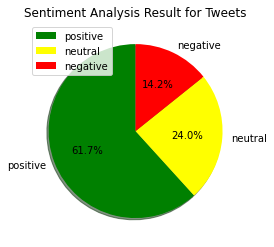

In [40]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
pichart['Percentage(%)'] = pichart['Percentage(%)'].str.replace('%', '')
size=pichart["Percentage(%)"]
  
# Create a circle for the center of the plot
my_circle=plt.Circle( (1,2), 0.67, color='white')
plt.title("Sentiment Analysis Result for Tweets" )
plt.pie(size, labels=names, colors=['green','yellow','red'], autopct='%1.1f%%', shadow=True, startangle=90)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [41]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


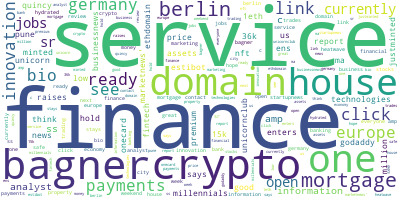

In [42]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["CleanedText"].values)

Word Cloud Saved Successfully


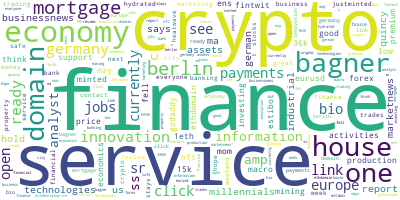

In [43]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["CleanedText"].values)

Word Cloud Saved Successfully


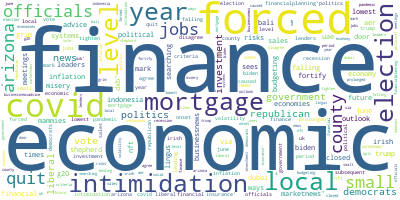

In [44]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["CleanedText"].values)

Word Cloud Saved Successfully


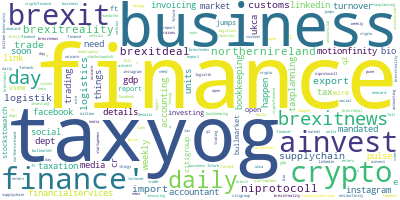

In [45]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["CleanedText"].values)

In [46]:
#Calculating tweet's lenght and word count
tw_list['Number_Of_Text'] = tw_list['CleanedText'].astype(str).apply(len)
tw_list['Number_Of_Words'] = tw_list['CleanedText'].apply(lambda x: len(str(x).split()))

In [47]:
tw_list

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,...,polarity,subjectivity,sentiment,sentiment_weight,neg,neu,pos,compound,Number_Of_Text,Number_Of_Words
0,Andrea Toucinho,"Consultante, Conférencière, Journaliste, Auteu...",2017-12-04 16:21:52+00:00,1314,2031,2812,False,2022-07-04 19:09:10+00:00,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","['innovation', 'payments', 'Europe', 'Finance']",...,0.200,0.5000,positive,1.0,0.000,0.611,0.389,0.6249,83,10
1,TMJ-RIP Finance Jobs,Follow this account for geo-targeted Finance j...,2009-04-22 11:28:51+00:00,283,185,0,False,2022-07-04 19:09:02+00:00,Click the link in our bio to see currently ope...,"['Finance', 'Quincy']",...,0.000,0.5000,positive,1.0,0.000,0.902,0.098,0.3612,142,25
2,World Finance News,Critical insights and analysis on Finance in t...,2022-03-11 19:06:05+00:00,1097,153,380,False,2022-07-04 19:08:58+00:00,"39% of US Millennials Hold Crypto Assets, Repo...","['businessnews', 'finance', 'marketnews']",...,0.000,0.0000,positive,1.0,0.000,0.866,0.134,0.1779,92,12
3,Comidoc,I'm a bot ! \nI post only *FREE* Udemy courses...,2018-06-21 14:51:57+00:00,3786,0,32585,False,2022-07-04 19:08:53+00:00,Investment Portfolio Optimization with Excel &...,"['Udemy','Value','Investing','Quantitative','F...",...,0.000,0.0000,positive,1.0,0.000,0.572,0.428,0.8934,205,24
4,motionfinity,Business Management │ Smart Brexit Solutions │...,2019-08-05 18:33:27+00:00,66,333,1374,False,2022-07-04 19:07:30+00:00,#Brexit daily #BrexitNews day #BrexitReality #...,"['Brexit', 'BrexitNews', 'BrexitReality', 'Bre...",...,0.000,0.0000,neutral,0.0,0.000,1.000,0.000,0.0000,230,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30032,themacrotweet,Charts related to economics and finance that a...,2022-03-02 09:44:58+00:00,279,82,10,False,2022-07-15 13:33:04+00:00,German Industrial Production: Mining support s...,"['fintwit', 'economics']",...,0.000,0.0000,positive,1.0,0.000,0.876,0.124,0.4019,165,22
30038,Prarthna,Excited about Tech transforming lives | Buildi...,2016-06-22 01:20:34+00:00,132,214,0,False,2022-07-15 13:31:01+00:00,FT Cryptofinance: Celsius’s fall into bankrupt...,"['Crypto', 'finance']",...,0.000,0.1250,neutral,0.0,0.000,1.000,0.000,0.0000,94,14
30040,gaslive.eth,exploring the hugeniverse,2021-04-01 13:22:45+00:00,178,747,888,False,2022-07-15 13:30:37+00:00,"just minted this bagner. 15K on estibot, 36K p...",NaN,...,0.350,0.4500,positive,1.0,0.058,0.861,0.081,0.2023,208,35
30046,TechStory,"Latest News from Tech, Crypto, EV, Space, AI, ...",2014-08-14 18:49:46+00:00,7052,21,2638,False,2022-07-15 13:30:14+00:00,"#OneCard enters #unicornclub, raises over $102...","['OneCard', 'unicornclub', 'unicorn', 'pune', ...",...,0.000,0.0000,neutral,0.0,0.000,1.000,0.000,0.0000,111,13


In [48]:
pd.DataFrame(tw_list.groupby("sentiment").Number_Of_Text.mean()).apply(np.ceil).astype('int')

,Number_Of_Text
sentiment,
negative,184
neutral,160
positive,206


In [49]:
pd.DataFrame(tw_list.groupby("sentiment").Number_Of_Words.mean()).apply(np.ceil).astype('int')

,Number_Of_Words
sentiment,
negative,26
neutral,21
positive,30


In [50]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['CleanedText'].apply(lambda x: remove_punct(x))

In [51]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [52]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [53]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [54]:
tw_list.head()

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,...,neg,neu,pos,compound,Number_Of_Text,Number_Of_Words,punct,tokenized,nonstop,stemmed
0,Andrea Toucinho,"Consultante, Conférencière, Journaliste, Auteu...",2017-12-04 16:21:52+00:00,1314,2031,2812,False,2022-07-04 19:09:10+00:00,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","['innovation', 'payments', 'Europe', 'Finance']",...,0.0,0.611,0.389,0.6249,83,10,in berlin germany ready for innovati...,"[in, berlin, germany, ready, for, innovation, ...","[berlin, germany, ready, innovation, payments,...","[berlin, germani, readi, innov, payment, europ..."
1,TMJ-RIP Finance Jobs,Follow this account for geo-targeted Finance j...,2009-04-22 11:28:51+00:00,283,185,0,False,2022-07-04 19:09:02+00:00,Click the link in our bio to see currently ope...,"['Finance', 'Quincy']",...,0.0,0.902,0.098,0.3612,142,25,click the link in our bio to see currently ope...,"[click, the, link, in, our, bio, to, see, curr...","[click, link, bio, see, currently, open, finan...","[click, link, bio, see, current, open, financ,..."
2,World Finance News,Critical insights and analysis on Finance in t...,2022-03-11 19:06:05+00:00,1097,153,380,False,2022-07-04 19:08:58+00:00,"39% of US Millennials Hold Crypto Assets, Repo...","['businessnews', 'finance', 'marketnews']",...,0.0,0.866,0.134,0.1779,92,12,of us millennials hold crypto assets report...,"[, of, us, millennials, hold, crypto, assets, ...","[, us, millennials, hold, crypto, assets, repo...","[, us, millenni, hold, crypto, asset, report, ..."
3,Comidoc,I'm a bot ! \nI post only *FREE* Udemy courses...,2018-06-21 14:51:57+00:00,3786,0,32585,False,2022-07-04 19:08:53+00:00,Investment Portfolio Optimization with Excel &...,"['Udemy','Value','Investing','Quantitative','F...",...,0.0,0.572,0.428,0.8934,205,24,investment portfolio optimization with excel ...,"[investment, portfolio, optimization, with, ex...","[investment, portfolio, optimization, excel, a...","[invest, portfolio, optim, excel, amp, r, udem..."
4,motionfinity,Business Management │ Smart Brexit Solutions │...,2019-08-05 18:33:27+00:00,66,333,1374,False,2022-07-04 19:07:30+00:00,#Brexit daily #BrexitNews day #BrexitReality #...,"['Brexit', 'BrexitNews', 'BrexitReality', 'Bre...",...,0.0,1.000,0.000,0.0000,230,22,brexit daily brexitnews day brexitreality ...,"[, brexit, daily, brexitnews, day, brexitreali...","[, brexit, daily, brexitnews, day, brexitreali...","[, brexit, daili, brexitnew, day, brexitr, bre..."


In [236]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(max_features=3000, stop_words='english') 
countVector = countVectorizer.fit_transform(tw_list['CleanedText']).toarray()
print('{} Number of reviews has {} words',countVector.shape)
countVector
# print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
# print(countVectorizer.get_feature_names())
# count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
# count_vect_df.head()

{} Number of reviews has {} words (8926, 3000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [164]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)  
countdf[1:11]

,0
stock,4480
tesla,2264
market,1231
cryptocurr,923
tsla,831
new,771
buy,709
alert,654
crypto,591
sell,515


# TF - IDF (Term Frequency - Inverse Data Frequency)

 ITF-IDF stands for “Term Frequency — Inverse Data Frequency”. First, we will learn what this term means mathematically.

Term Frequency (tf): gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.



In [203]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [204]:
vectorizer = TfidfVectorizer()

In [205]:
x_train, x_test, y_train, y_test = train_test_split(tw_list['CleanedText'], tw_list['sentiment_weight'], 
                                                    test_size = 0.3, random_state = 7)

In [206]:
tf_x_train = vectorizer.fit_transform(x_train) # to calculate the TF-IDF score for the text.

In [207]:
tf_x_train = vectorizer.transform(x_train)
tf_x_train.shape

(6248, 10062)

In [170]:
print("n_samples: %d, n_features: %d" %tf_x_train.shape)

n_samples: 6248, n_features: 10062


In [171]:
tf_x_test = vectorizer.transform(x_test) # transform the test data into TF-IDF matrix format

In [172]:
tf_x_test.shape

(2678, 10062)

In [173]:
print("n_samples: %d, n_features: %d" %tf_x_test.shape)

n_samples: 2678, n_features: 10062


# SVC(Support Vector Machine)

It gives greater accuracy by automatically avoiding overfitting of the data

In [229]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [230]:
svc_model = SVC()
svc_model.fit(tf_x_train, y_train)

svc_accuracy = accuracy_score(y_test, svc_pred) *100
svc_accuracy

85.13816280806572

In [231]:
svc_pred = svc_model.predict(tf_x_test)
svc_pred

array([0., 0., 0., ..., 1., 0., 1.])

# KNN

In [181]:
from sklearn.neighbors import KNeighborsClassifier

In [182]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(tf_x_train, y_train)
knn_pred = knn.predict(tf_x_test)
knn_accuracy = accuracy_score(y_test, knn_pred) *100
knn_accuracy

75.39208364451083

# Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
rnd = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=50)
rnd

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=50)

In [185]:
rnd.fit(tf_x_train, y_train)
rnd_pred = rnd.predict(tf_x_test)
rnd_accuracy = accuracy_score(y_test, rnd_pred) *100
rnd_accuracy

68.93203883495146

# Naive Bayes Classifier

Naive Bayes (NB) which can provide accurate results without much training data


Texts have to be transformed into vectors before classification.

Those numbers will help the algorithm decide whether the vector representation of a text belongs to a category or not. 

In [123]:
from sklearn import model_selection, naive_bayes

In [125]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(tf_x_train, y_train)

nb_pred = Naive.predict(tf_x_test)
nb_pred

nb_accuracy = accuracy_score(nb_pred, y_test)*100
nb_accuracy

78.19268110530247

# Comparison of different models

In [239]:
all_algo = ['SVC', 'KNN','Naive Bayes','Random Forest']
all_accuracy = [svc_accuracy, knn_accuracy, rnd_accuracy, nb_accuracy]
all_compare = pd.DataFrame({'Models: ' : all_algo, 'Accuracy: ' : all_accuracy}, index = [i for i in range(1, 5)])
all_compare.T

,1,2,3,4
Models:,SVC,KNN,Naive Bayes,Random Forest
Accuracy:,85.138163,75.392084,68.932039,78.192681


In [240]:
all_compare.style.bar(subset=['Accuracy: '], color='#bfe8ae')

,Models:,Accuracy:
1,SVC,85.138163
2,KNN,75.392084
3,Naive Bayes,68.932039
4,Random Forest,78.192681


In [241]:
import seaborn as sns

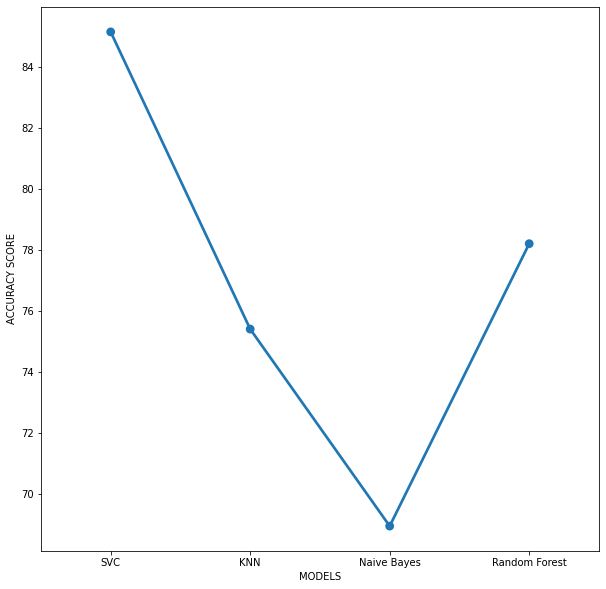

In [242]:
plt.figure(figsize = (10, 10))
sns.pointplot(x = all_compare["Models: "], y = all_compare["Accuracy: "], data = all_compare)
plt.xlabel('MODELS')
plt.ylabel('ACCURACY SCORE')
plt.show()